In [ ]:
import math 
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy import stats
import matplotlib
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Romania'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [ ]:
df

,Rank,Title,Romanian Leu,U.S. dollar,Year,Ref
0,1,Avatar,18537471,"$6,317,366",2009,[# 1]
1,2,Aquaman,15722391,"$3,848,753",2018,[# 2]
2,3,Avengers: Endgame,14401724,"$3,379,432",2019,[# 3]
3,4,Spider-Man: No Way Home,13610424,"$3,116,598",2021,[# 4]
4,5,Star Wars: The Force Awakens,13515925,"$3,256,966",2015,[# 5]
5,6,Frozen II,13453922,"$3,119,154",2019,[# 6]
6,7,The Fate of the Furious,13316052,"$3,171,017",2017,[# 7]
7,8,Miami Bici,11603217,"$2,666,761",2020,[# 8]
8,9,Furious 7,11187310,"$2,739,771",2015,[# 9]
9,10,Joker,11126579,"$2,586,493",2019,[# 10]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          50 non-null     int64 
 1   Title         50 non-null     object
 2   Romanian Leu  50 non-null     int64 
 3   U.S. dollar   50 non-null     object
 4   Year          50 non-null     int64 
 5   Ref           50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


In [ ]:
df['U.S. dollar']=df['U.S. dollar'].str.replace(r"$","").str.replace(r",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Rank,Title,Romanian Leu,U.S. dollar,Year,Ref
0,1,Avatar,18537471,6317366,2009,[# 1]
1,2,Aquaman,15722391,3848753,2018,[# 2]
2,3,Avengers: Endgame,14401724,3379432,2019,[# 3]
3,4,Spider-Man: No Way Home,13610424,3116598,2021,[# 4]
4,5,Star Wars: The Force Awakens,13515925,3256966,2015,[# 5]
5,6,Frozen II,13453922,3119154,2019,[# 6]
6,7,The Fate of the Furious,13316052,3171017,2017,[# 7]
7,8,Miami Bici,11603217,2666761,2020,[# 8]
8,9,Furious 7,11187310,2739771,2015,[# 9]
9,10,Joker,11126579,2586493,2019,[# 10]


In [ ]:
df = df.astype({'U.S. dollar': np.int64})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          50 non-null     int64 
 1   Title         50 non-null     object
 2   Romanian Leu  50 non-null     int64 
 3   U.S. dollar   50 non-null     int64 
 4   Year          50 non-null     int64 
 5   Ref           50 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [ ]:
df.head()

,Rank,Title,Romanian Leu,U.S. dollar,Year,Ref
0,1,Avatar,18537471,6317366,2009,[# 1]
1,2,Aquaman,15722391,3848753,2018,[# 2]
2,3,Avengers: Endgame,14401724,3379432,2019,[# 3]
3,4,Spider-Man: No Way Home,13610424,3116598,2021,[# 4]
4,5,Star Wars: The Force Awakens,13515925,3256966,2015,[# 5]


In [ ]:
df.drop(['Rank', 'Ref'],axis=1,inplace=True)

In [ ]:
df.head()

,Title,Romanian Leu,U.S. dollar,Year
0,Avatar,18537471,6317366,2009
1,Aquaman,15722391,3848753,2018
2,Avengers: Endgame,14401724,3379432,2019
3,Spider-Man: No Way Home,13610424,3116598,2021
4,Star Wars: The Force Awakens,13515925,3256966,2015


In [ ]:
df1=df[['Title','U.S. dollar','Year']].sort_values(ascending=False,by='U.S. dollar')

In [ ]:
df1

,Title,U.S. dollar,Year
0,Avatar,6317366,2009
1,Aquaman,3848753,2018
2,Avengers: Endgame,3379432,2019
4,Star Wars: The Force Awakens,3256966,2015
6,The Fate of the Furious,3171017,2017
5,Frozen II,3119154,2019
3,Spider-Man: No Way Home,3116598,2021
11,The Hobbit: The Battle of the Five Armies,2939962,2014
10,Jumanji: Welcome to the Jungle,2895908,2017
8,Furious 7,2739771,2015


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 48
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        50 non-null     object
 1   U.S. dollar  50 non-null     int64 
 2   Year         50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


Визуальная проверка нормальности даннных

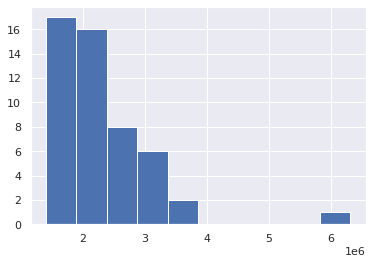

In [ ]:
plt.hist(df1['U.S. dollar'])
plt.show()

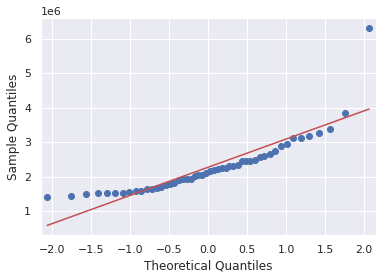

In [ ]:
qqplot(df1['U.S. dollar'],line = 's')
plt.show()

Тест Шапиро-Вилка

In [ ]:
from scipy.stats import shapiro
stats,p = shapiro(df['U.S. dollar'])
print('Statistics = %.3f,p=%.3f'%(stats,p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian(fail to  reject H0)')
else:
  print('Sample does not look Gaussian ( reject H0)')

Statistics = 0.780,p=0.000
Sample does not look Gaussian ( reject H0)


Тест д'Агостино на K ^ 2

In [ ]:
from scipy.stats import normaltest
stats,p = normaltest(df['U.S. dollar'])
print('Statistics = %.3f,p=%.3f'%(stats,p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to  reject H0)')
else:
  print('Sample does not look Gaussian ( reject H0)')

Statistics = 49.320,p=0.000
Sample does not look Gaussian ( reject H0)


Тест Андерсона-Дарлинга

In [ ]:
from scipy.stats import anderson
result = anderson(df['U.S. dollar'])
print('Statistics: %.3f'% result.statistic)
p = 0
for  i in range(len(result.critical_values)):
  sl,cv = result.significance_level[i],result.critical_values[i]
  if  result.statistic < result.critical_values[i]:
    print( '%.3f: %.3f,data looks normal (fail to reject H0)'%(sl,cv))
  else: 
    print( '%.3f: %.3f,data does look normal (reject H0)'%(sl,cv))

Statistics: 1.969
15.000: 0.538,data does look normal (reject H0)
10.000: 0.613,data does look normal (reject H0)
5.000: 0.736,data does look normal (reject H0)
2.500: 0.858,data does look normal (reject H0)
1.000: 1.021,data does look normal (reject H0)


In [ ]:
tab = pd.DataFrame({'№': ['1'], 'Название переменной': ['Statistics'], 'Визуальной проверки нормальности данных': ['гистограмма'], 'Сюжет QQ': ['график'], 'Тест Шапиро-Вилка': [0.780], 'K2-тест ДАгостино': [49.320], 'Тест Андерсона-Дарлинга': [1.969]})

In [ ]:
tab

,№,Название переменной,Визуальной проверки нормальности данных,Сюжет QQ,Тест Шапиро-Вилка,K2-тест ДАгостино,Тест Андерсона-Дарлинга
0,1,Statistics,гистограмма,график,0.78,49.32,1.969
